# Time series analysis and modelling

## Project and its goal

The project is about analysis and modelling the time series.

Tasks included into the project:
- Fit one or several models on the data to predict the target
- Build a tuning job
- Validate the tuned model on a time window
- Forecast the value of the target for the date 2018/08/09


## Plan of attack

The first step is data pre-processing. Here I would like to analyze dataset main characteristics including descriptive statistics, detect missing values, assure that our dataset is time series (date indeces are ordered and have no missing).

Next, I would like to focus on pure time series methods for modelling starting from naive forecast which is baseline in time series forecasting. Pure time series methods of forecasting include naive forecasting, moving average, exponantial smoothing, ARIMA, ARIMAX.
Each model will be validated on the appropriate time window to calculate performance metrics (mean squared errors, mean absolute percentage error etc.)
Using each type of model, forecast for the day 2018-08-09 will be carried out.

After that, I would like to focus on ML algorithm mainly regression (and deep learning depending on time availability). During regression analysis, I will focus on predictive power of model rather than on accuracy of the model fit. Also feature selection/extraction techiques will be involved to increase models accuracy and reduce computation time.
All the models will be validated using time window and forecast for the day 2018-08-09 will be carried out.

Finally, all the models will be grouped into the final table with performance metrics and forecasted value and the most appropriate forecast will be choosen.


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
sns.set()

### Import data

In [2]:
raw_data = pd.read_csv('data/NG_sample_data.csv', index_col = 'Datetime')

In [3]:
raw_data.head(10)

,target,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-11-24,1.375987,-0.377984,-0.709578,0,0.009969,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,...,-1.356282,-0.260561,-0.262166,-1.286846,-1.739444,-0.757923,-0.567832,-1.806565,-0.797512,0
2014-11-25,1.308962,-0.377984,-0.709578,0,0.009969,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.739444,-0.757923,-0.567832,-1.806565,-0.797512,0
2014-11-26,1.308962,-0.377984,-0.709578,0,-0.853987,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.739444,-0.757923,-0.567832,-1.806565,-0.797512,0
2014-11-27,1.387956,-0.377984,-0.709578,0,-0.853987,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.739444,-0.757923,-0.567832,-1.806565,-0.797512,0
2014-11-30,1.545944,-0.377984,-0.709578,0,-0.299167,-0.555276,-1.650423,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.304331,-0.757923,0.856521,-1.806565,-0.797512,0
2014-12-01,1.522006,-0.377984,-0.709578,0,-0.299167,-0.555276,-1.650423,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.304331,-0.757923,0.856521,-1.806565,-0.797512,0
2014-12-02,1.682387,-0.377984,-0.709578,0,-0.299167,-0.555276,-1.881758,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,0.000456,-1.286846,-1.304331,-0.757923,0.856521,-1.806565,-0.797512,0
2014-12-03,1.761381,-0.377984,-0.709578,0,-0.299167,-0.555276,-1.881758,-0.422569,-0.750465,-0.314318,...,-1.385088,-0.260561,-0.262166,-1.286846,-1.304331,-0.757923,0.856521,-1.806565,-0.797512,0
2014-12-04,1.861919,-0.377984,-0.709578,0,-0.299167,-0.555276,-1.881758,-0.422569,-0.750465,-0.314318,...,-1.481587,-0.260561,-0.262166,-1.286846,-1.304331,-0.757923,0.856521,-1.852078,-0.797512,0


Data set shape (rows x columns):

In [4]:
print(raw_data.shape)

(969, 254)


Set display option to show data set properly

In [5]:
# set display options which allow to see entire data set
pd.set_option("display.max_columns", 260)
pd.set_option("display.max_columns", 1000)

In [6]:
raw_data

,target,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_238,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-24,1.375987,-0.377984,-0.709578,0,0.009969,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,-0.51494,-0.418657,-0.711304,-1.503216,-1.899918,0.063755,-0.251508,-0.629033,-0.342428,0,0.140523,-0.959059,-0.588702,-0.338105,-0.27931,-0.297349,-0.908814,-0.152570,-0.417911,-0.100694,-1.428561,-0.874794,-0.031481,-0.604448,-0.904958,-0.462950,-1.354503,-0.511223,-0.300922,-0.751016,-0.094745,-0.333528,-2.126439,0,-0.331129,0,-1.180125,-1.347144,-0.18417,-0.24061,-0.338807,-1.692463,-0.348524,-0.345020,-0.162551,0.568986,-0.410534,-0.284734,0,0,-0.373727,-0.290405,-0.264415,-0.524531,-0.283221,-0.231957,-0.351516,-0.162551,-1.322591,-0.362881,-0.299676,-0.521312,-0.727601,-0.542728,-0.376504,-0.523697,-0.355903,-0.286934,-0.527107,-0.394411,-0.399091,-1.357125,-0.250821,-0.338798,0,0,-0.620854,-0.874576,-1.216423,-0.482059,-0.72478,-0.530635,-0.432534,0.006292,-0.266552,-0.17129,0.386532,-0.467970,-0.826119,-1.139331,-1.673693,-0.536671,-0.168859,2.166213,-0.613082,-1.126403,-0.252014,-0.765250,-0.490931,-0.297556,-0.603653,-0.52061,-0.503580,0.249585,-0.886407,-0.702328,-0.118991,-0.311253,-0.745091,-0.183785,-0.782489,-0.475284,-0.472814,-0.462950,-0.730265,-1.451389,-0.134429,-0.427399,-0.506705,-0.290405,-0.332794,-0.789050,-0.563889,-0.783614,-0.245641,-0.854156,0,-1.193249,-0.442215,-0.142134,0,-0.878493,-0.650648,0.234116,-0.266552,-0.908814,-0.044544,-0.363153,-0.22092,-0.190493,-0.31279,-0.083541,-0.536622,-0.457844,-0.536439,-0.613812,-0.656820,-0.320344,-0.564351,-0.283049,-0.506828,-0.586494,-0.407777,-1.008286,-0.23298,-0.577889,0.190820,-0.532533,-1.214098,-0.201622,-0.143517,-1.098897,-0.331129,3.529094,-0.490673,0,-0.043542,-0.362118,-1.293808,-0.481319,-1.234413,0,0.190594,-0.314013,-0.977397,0,-0.171217,-0.168859,-0.517878,0,-0.375395,-0.281585,-0.327405,0,-0.61

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2014-11-24 to 2018-08-09
Columns: 254 entries, target to col_253
dtypes: float64(237), int64(17)
memory usage: 1.9+ MB


#### Detecting missing values

In [8]:
# detecting columns with null values
fields_with_nan = raw_data.isna().sum()\
.where(lambda x: x>0)\
.dropna()
fields_with_nan

target    1.0
dtype: float64

As we may see, there are no missing values. The only missing value is the target value on the date 2018-08-09 which we are going to predict.

#### Descriptive statistics for data set

In [9]:
raw_data.describe()

,target,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_238,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253
count,968.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.0,969.000000,

After analysis of the information, we may conclude there are number of columns with all zeros which definetely have no impact on the target value.

In [10]:
# identified columns with zeros: col_3, col_19, col_43, col_45, col_58, col_59, col_84, col_85, col_136, col_140,
# col_175, col_181, col_185, col_189, col_193, col_238, col_253

Let us detect which columns all contain zeros:

In [11]:
columns_with_zeros = []
for col in raw_data:
    if raw_data[col].values.all()==0:        
        columns_with_zeros.append(col)
columns_with_zeros

['col_3',
 'col_19',
 'col_43',
 'col_45',
 'col_58',
 'col_59',
 'col_84',
 'col_85',
 'col_136',
 'col_140',
 'col_175',
 'col_181',
 'col_185',
 'col_189',
 'col_193',
 'col_238',
 'col_253']

We may drop columns with all zeros.

In [12]:
df = raw_data.drop(columns_with_zeros, axis=1)
df.head()

,target,col_1,col_2,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_44,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_137,col_138,col_139,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_176,col_177,col_178,col_179,col_180,col_182,col_183,col_184,col_186,col_187,col_188,col_190,col_191,col_192,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-24,1.375987,-0.377984,-0.709578,0.009969,-0.555276,-2.066827,-0.422569,-0.750465,-0.314318,-0.51494,-0.418657,-0.711304,-1.503216,-1.899918,0.063755,-0.251508,-0.629033,-0.342428,0.140523,-0.959059,-0.588702,-0.338105,-0.27931,-0.297349,-0.908814,-0.15257,-0.417911,-0.100694,-1.428561,-0.874794,-0.031481,-0.604448,-0.904958,-0.46295,-1.354503,-0.511223,-0.300922,-0.751016,-0.094745,-0.333528,-2.126439,-0.331129,-1.180125,-1.347144,-0.18417,-0.24061,-0.338807,-1.692463,-0.348524,-0.345020,-0.162551,0.568986,-0.410534,-0.284734,-0.373727,-0.290405,-0.264415,-0.524531,-0.283221,-0.231957,-0.351516,-0.162551,-1.322591,-0.362881,-0.299676,-0.521312,-0.727601,-0.542728,-0.376504,-0.523697,-0.355903,-0.286934,-0.527107,-0.394411,-0.399091,-1.357125,-0.250821,-0.338798,-0.620854,-0.874576,-1.216423,-0.482059,-0.72478,-0.530635,-0.432534,0.006292,-0.266552,-0.17129,0.386532,-0.46797,-0.826119,-1.139331,-1.673693,-0.536671,-0.168859,2.166213,-0.613082,-1.126403,-0.252014,-0.765250,-0.490931,-0.297556,-0.603653,-0.52061,-0.50358,0.249585,-0.886407,-0.702328,-0.118991,-0.311253,-0.745091,-0.183785,-0.782489,-0.475284,-0.472814,-0.46295,-0.730265,-1.451389,-0.134429,-0.427399,-0.506705,-0.290405,-0.332794,-0.78905,-0.563889,-0.783614,-0.245641,-0.854156,-1.193249,-0.442215,-0.142134,-0.878493,-0.650648,0.234116,-0.266552,-0.908814,-0.044544,-0.363153,-0.22092,-0.190493,-0.31279,-0.083541,-0.536622,-0.457844,-0.536439,-0.613812,-0.65682,-0.320344,-0.564351,-0.283049,-0.506828,-0.586494,-0.407777,-1.008286,-0.23298,-0.577889,0.190820,-0.532533,-1.214098,-0.201622,-0.143517,-1.098897,-0.331129,3.529094,-0.490673,-0.043542,-0.362118,-1.293808,-0.481319,-1.234413,0.190594,-0.314013,-0.977397,-0.171217,-0.168859,-0.517878,-0.375395,-0.281585,-0.327405,-0.613985,1.75778,-0.528536,-0.491999,-2.467524,-0.158283,-0.850533,-0.952243,-0.219307,-0.400977,-0.660031,-0.916729,-0.272254,-0.754260,-0.517674,-0.686128,-0.552389,-0.717836,-0.99260

### Quick visualization

Quick visualization of target values can help us to enderstand what type of data we have and have it is being changed in time.

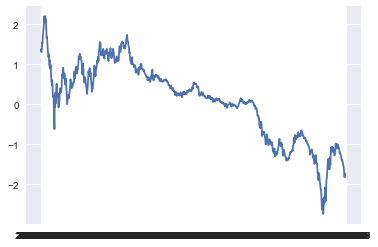

In [13]:
target = raw_data['target']
plt.plot(target);

As we may see from the gaph, our time series are not stationar. We have trend.

After analysis of the data, we can conclude that we have time series comprised only of business days (we have 5 days in a row and then 2 absent days). Moreover, these are arabic business days since working week starts on Sunday and finish on Thursday. 

We should verify if our data are really time series - if our date data are ordered with no missing values. 

In [14]:
# convert index of dataframe to Series
s = pd.to_datetime(pd.Series(df.index.values))

# date range with arabic business days from the min and max date from dataset
weekmask = 'Sun Mon Tue Wed Thu'
custombday = pd.offsets.CustomBusinessDay(weekmask=weekmask)
s1 = pd.Series(pd.bdate_range(start='2014-11-24', end='2018-08-09', freq=custombday))

# compare two date ranges - one from dataset and another just created
s.equals(s1)

True

As we may see, dataset comprises all business days within date range from 2014-11-24 to 2018-08-09. Thus, our dataset is time series with ordered data and no missing indeces. 

### Pure time series forecasting methods

#### Naive forecasting

In [15]:
# create lagged dataset
values = df['target']
values = values.drop(index='2018-08-09')
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['lag-1 target', 'target']
dataframe.head()

,lag-1 target,target
Datetime,,
2014-11-24,NaN,1.375987
2014-11-25,1.375987,1.308962
2014-11-26,1.308962,1.308962
2014-11-27,1.308962,1.387956
2014-11-30,1.387956,1.545944


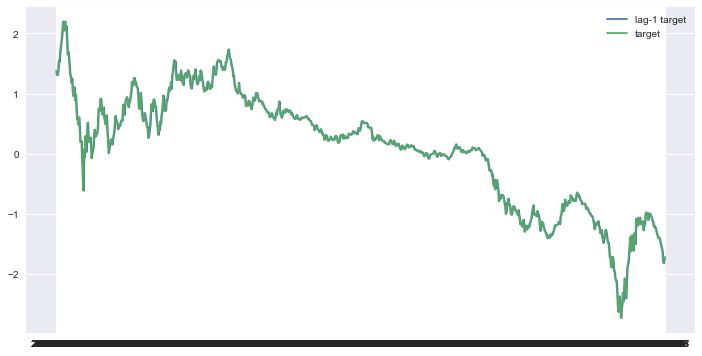

In [16]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(dataframe['lag-1 target'])
plt.plot(dataframe['target'])
plt.legend(['lag-1 target', 'target'], loc='upper right')

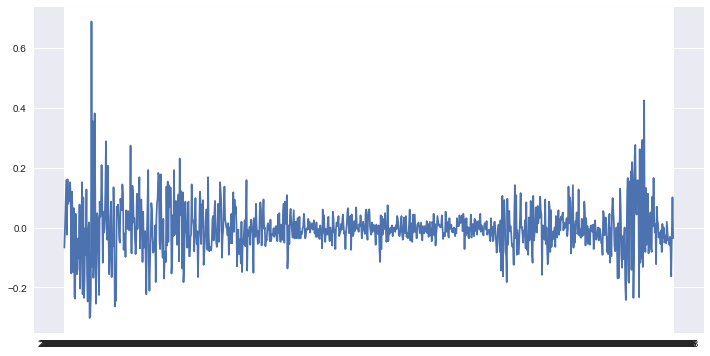

In [17]:
naive_error = dataframe['target'] - dataframe['lag-1 target']
plt.plot(naive_error)

Test MSE: 0.007


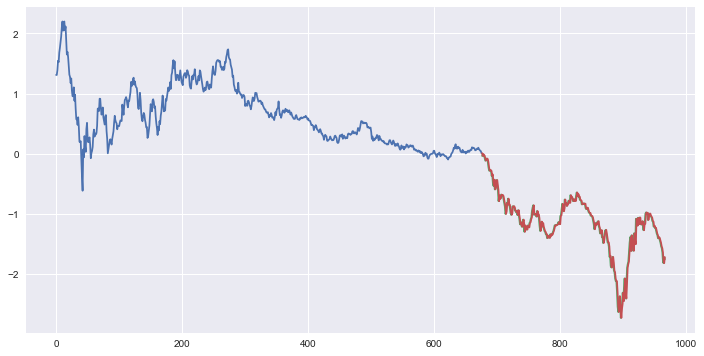

In [18]:
# split into train and test sets, 70/30% 
threshold = 0.7
X = dataframe.values
train_size = int(len(X) * threshold)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

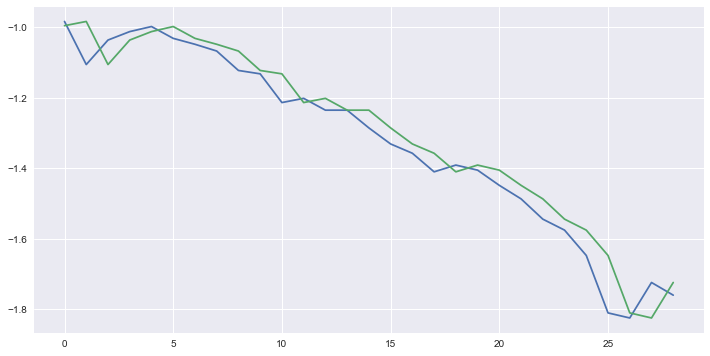

In [19]:
# visualization for the last month
last_month_actual_values = dataframe.loc['2018-07-01':, 'target']
last_month_lagged_values = dataframe.loc['2018-07-01':, 'lag-1 target']

plt.plot([x for x in last_month_actual_values])
plt.plot([x for x in last_month_lagged_values])
plt.legend
plt.show()

As per naive forecast, the forecast for the day 2018-08-09 will be the same as the value for the previous day: 

In [20]:
dataframe.loc['2018-08-08', 'target']

-1.7598264121977116

#### Forecasting using moving average

In [21]:
# split into train and test sets, 70/30% 
threshold = 0.7

windows = [5, 10, 15, 20, 25, 30]
test_scores = []
ts_dataset = df['target']
ts_dataset = ts_dataset.drop(index='2018-08-09', axis=1)

train_size = int(len(ts_dataset) * threshold)
train, test = ts_dataset[1:train_size], ts_dataset[train_size:]

for i in windows:
    rolling_average = ts_dataset.rolling(window=i).mean()
    test_MA = rolling_average[train_size:]
    test_score = mean_squared_error(test, test_MA)
    test_scores.append(test_score)
    print('For window = ', i, 'Test MSE: %.3f' % test_score)

For window =  5 Test MSE: 0.008
For window =  10 Test MSE: 0.021
For window =  15 Test MSE: 0.039
For window =  20 Test MSE: 0.061
For window =  25 Test MSE: 0.083
For window =  30 Test MSE: 0.104


As we may see, the bigger the window, the higher MSE. The best result we have for window = 5.
We can forecast the value of the target for the day 2018-08-09 as the moving average of the last 5 days:

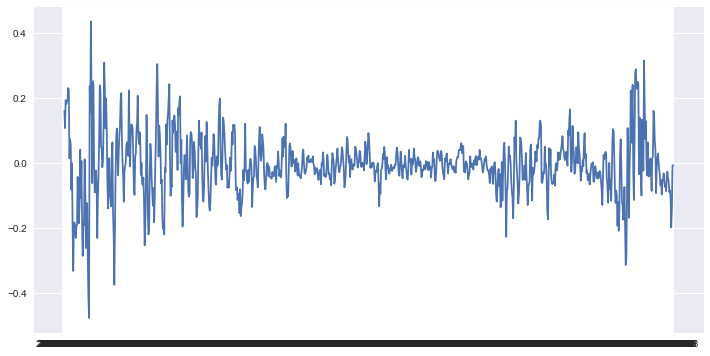

In [22]:
rolling_average = ts_dataset.rolling(window=5).mean()
error = ts_dataset - rolling_average
plt.plot(error)

In [23]:
np.mean(df['target'].tail(5))

-1.77957485714266

Visualization for last 3 months:

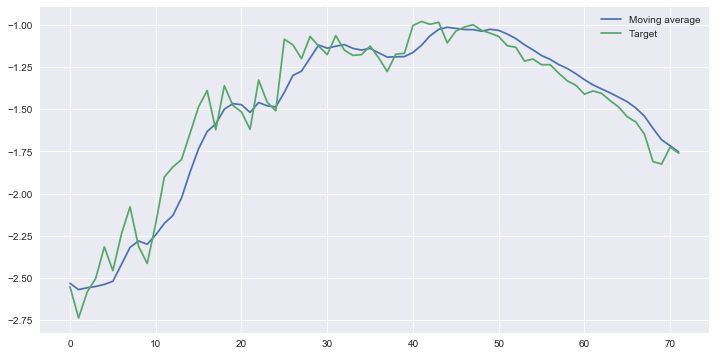

In [24]:
last_month_MA = rolling_average.loc['2018-05-01':]
last_month_y = ts_dataset.loc['2018-05-01':]

plt.plot([i for i in last_month_MA])
plt.plot([i for i in last_month_y])
plt.legend(['Moving average', 'Target'], loc='upper right')
plt.show()

#### Exponential Smoothing

Our time series dataset have trend and no seasonality. So we should select double exponential smoothing (also known as Holt's exponential smoothing).

L(t) = alfa * Y(t) + (1-alfa) * (L(t-1) + T(t-1)) - updated level <br/>
T(t) = beta*(L(t) - L(t-1)) + (1-beta) * T(t-1) - updated trend <br/>
F(t+k) = L(t) + k * T(t) - forecasted value for additive trend <br/>
F(t+k) = L(t) * k * T(t) - forecasted value formultiplicative trend

In [25]:
from statsmodels.tsa.holtwinters import Holt

In [26]:
train_holt = train.copy()
test_holt = test.copy()

def holt_analysis(train, test, smoothing_level, smoothing_slope):
    model = Holt(train, exponential=False, damped=False)
    model_fit = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
   # predict = model_fit.predict(test)
    return mean_squared_error(predict, test)

alfa = np.arange(0.05, 0.65, 0.05)
beta = np.arange(0.05, 0.65, 0.05)

'''
minimum = 1000
for i in alfa:
    for j in beta:
        minimum = holt_analysis(train_holt, test_holt, i, j)
        if holt_analysis(train_holt, test_holt, i, j) < minimum:
            minimum = holt_analysis(train_holt, test_holt, i, j)
            alfa_final = i
            beta_final = j 

mse_holt = holt_analysis(train_holt, test_holt, alfa_final, beta_final) 
'''   


'\nminimum = 1000\nfor i in alfa:\n    for j in beta:\n        minimum = holt_analysis(train_holt, test_holt, i, j)\n        if holt_analysis(train_holt, test_holt, i, j) < minimum:\n            minimum = holt_analysis(train_holt, test_holt, i, j)\n            alfa_final = i\n            beta_final = j \n\nmse_holt = holt_analysis(train_holt, test_holt, alfa_final, beta_final) \n'

### Feature engineering

Since columns titles are meaningless, we cannot select features based on domain knowledge. 
But we can approach this problem from feature selection/extraction side. As a feature selection technique, we may use Pearson correlation coefficient, as a feature extraction technique PCA may be used.

Firstly, we apply feature selection using Pearson correlation coefficient to identify how target value is explained by features.

As a rule of thumb, correlation coeeficients mean: <br/>
corr < 0.2 - no relationship <br/>
corr = 0.2 ... 0.4 - weak relationship<br/>
corr = 0.4 ... 0.6 - moderte relationship<br/>
corr = 0.6 ... 0.8 - strong relationship<br/>
corr = 0.8 ... 1.0 - very strong relationship

In [27]:
# ---- computationally expensive but very nice graph --------
#cov_matrix = df.corr(method='pearson')
#sns.heatmap(cov_matrix, square=False, annot=True, cmap=sns.cubehelix_palette(8)).set_title('Features correlation');

In [28]:
# select features which correlation coefficient are above some threshold
def selected_features(dataframe, threshold):
    corr = dataframe.corr()
    selected_features = corr.iloc[:, 0].sort_values(ascending = False)[abs(corr.iloc[:, 0])>=threshold]
    selected_features = selected_features.drop('target')
    return selected_features.index.values

In [29]:
selected_features(df, 0.5)

array(['col_142', 'col_68', 'col_198', 'col_205', 'col_247', 'col_35',
       'col_123', 'col_31', 'col_14', 'col_73', 'col_5', 'col_168',
       'col_137', 'col_171', 'col_81', 'col_125', 'col_13', 'col_223',
       'col_30', 'col_105', 'col_226', 'col_36', 'col_98', 'col_178'],
      dtype=object)

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

# train/test split 80/20
threshold = 0.8
reg_dataset = df.copy()
reg_dataset = reg_dataset.drop(index='2018-08-09', axis=1)

train_size = int(len(reg_dataset) * threshold)
train, test = reg_dataset[1:train_size], reg_dataset[train_size:]

In [31]:
thresholds = np.arange(0.4, 0.85, 0.05)

y = train['target']
y_test = test['target']

def lin_reg_analysis(threshold):
    print('Threshold:', threshold)
    columns = selected_features(reg_dataset, threshold)
    print('Number of features: ', len(columns))
    X = train[columns]    
    X_test = test[columns]    
    linreg = LinearRegression()
    linreg.fit(X,y)
    return linreg.predict(X_test)

for threshold in thresholds:
    predicted_values = lin_reg_analysis(threshold)
    print('MSE: ', mean_squared_error(predicted_values, y_test))
    print('----------------------')


Threshold: 0.4
Number of features:  37
MSE:  0.8313260177856283
----------------------
Threshold: 0.45
Number of features:  32
MSE:  0.9435168869373635
----------------------
Threshold: 0.5
Number of features:  24
MSE:  0.9735583531045287
----------------------
Threshold: 0.55
Number of features:  21
MSE:  0.9668017402539764
----------------------
Threshold: 0.6
Number of features:  17
MSE:  0.8590926276979844
----------------------
Threshold: 0.6499999999999999
Number of features:  13
MSE:  1.0625510563423073
----------------------
Threshold: 0.7
Number of features:  10
MSE:  0.8182147232466113
----------------------
Threshold: 0.75
Number of features:  8
MSE:  0.7541461829553893
----------------------
Threshold: 0.7999999999999999
Number of features:  5
MSE:  0.7458479329663987
----------------------


In [32]:
# features for the lowest MSE
columns = selected_features(reg_dataset, 0.8)
columnsvalue = df.loc['2018-08-09', 'col_1':].values.reshape(1,-1)

In [33]:
X = train[columns]
linreg = LinearRegression()
linreg.fit(X,y)
x_pred = df.loc['2018-08-09':, columns]
linreg.predict(x_pred)

array([-0.34592004])

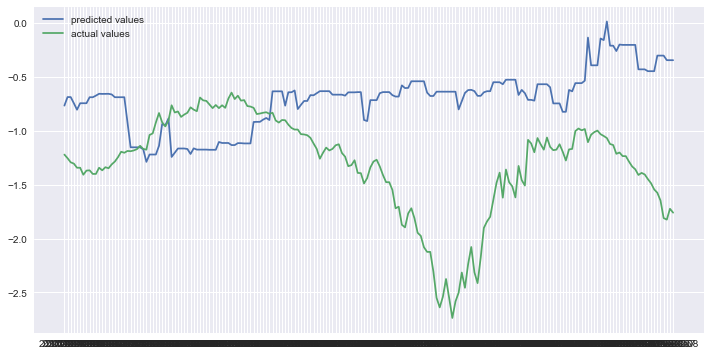

In [34]:
plt.plot(predicted_values)
plt.plot(y_test)
plt.legend(['predicted values', 'actual values'])

# Part II

The target of the Part II will be to focus on advanced linear models from sklearn package. 

Three types of regression with regularozation will be taken into consideration:
- Ridge Regression (L2 regularozation)
- Lasso Regression (L1 regularization)
- ElasticNet regression (L1 and L2 regularization)

Regularzation prevents model from overfitting by penalizing coefficients. Lasso regression can penalize the coefficients to zero and thus conducts feature selection while Ridge regression keeps all the coefficients.

ElasticNet is a combination of both.

Then tuning job will be implemented. There two main techniques of tuning hyper-prameters: Grid Search (where all the combination of provided hyper parameters are checked) and Randomized Search (randomly selected values, more efficient but less effective).

In this project Grid Search will be implemented.

### Train and test data set for regression models

In [35]:
# train and test datasets
threshold = 0.8
ridge_dataset = df.copy()
ridge_dataset = ridge_dataset.drop(index='2018-08-09', axis=1)

train_size = int(len(ridge_dataset) * threshold)
train, test = ridge_dataset[1:train_size], ridge_dataset[train_size:]

y_train = train['target']
y_test = test['target']
X_train = train.drop(['target'], axis=1)    
X_test = test.drop(['target'], axis=1)   


### Ridge Regression

absolute sum of coefficients:  11.375 for alpha =  0.001
absolute sum of coefficients:  11.291 for alpha =  0.01
absolute sum of coefficients:  10.626 for alpha =  0.1
absolute sum of coefficients:  8.297 for alpha =  1
absolute sum of coefficients:  6.877 for alpha =  3
absolute sum of coefficients:  6.293 for alpha =  5
absolute sum of coefficients:  5.534 for alpha =  10
absolute sum of coefficients:  3.979 for alpha =  50


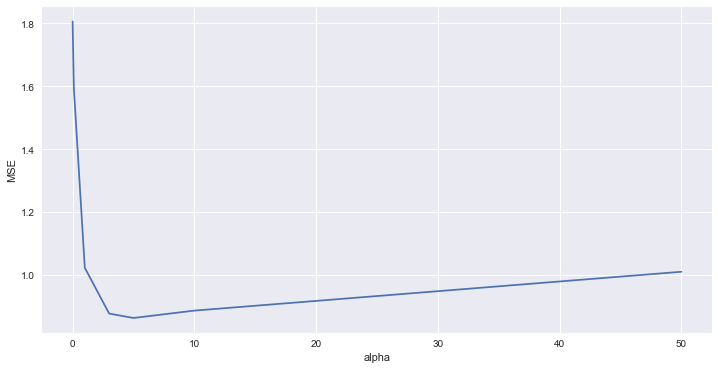

In [36]:
# Ridge Regression

from sklearn.linear_model import Ridge

def ridge_regression(alpha):
    ridgereg = Ridge(alpha = alpha)
    ridgereg.fit(X_train, y_train)
    print( 'absolute sum of coefficients: ', round(sum(abs(ridgereg.coef_)),3), 'for alpha = ', alpha)
    return ridgereg.predict(X_test)

alphas = [0.001, 0.01, 0.1, 1, 3, 5, 10, 50]
mse = []

for i in alphas:
    pred = ridge_regression(i)
    mse_ = mean_squared_error(pred, y_test)
    mse.append(mse_)

plt.plot(alphas, mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()


As we may see, coeeficients are penalized thus higher alpha means lower coefficients. Also, from the chart we may see that optimal value of alpha is about alpha = 3.

### Lasso Regression

alpha =  0.0001
absolute sum of coefficients:  8.186 for alpha =  0.0001
MSE:  1.2423984274804665
--------------------------
alpha =  0.0005
absolute sum of coefficients:  4.998 for alpha =  0.0005
MSE:  0.7989066611110859
--------------------------
alpha =  0.001
absolute sum of coefficients:  3.855 for alpha =  0.001
MSE:  0.8621814354949336
--------------------------
alpha =  0.01
absolute sum of coefficients:  1.824 for alpha =  0.01
MSE:  1.2411380823018614
--------------------------


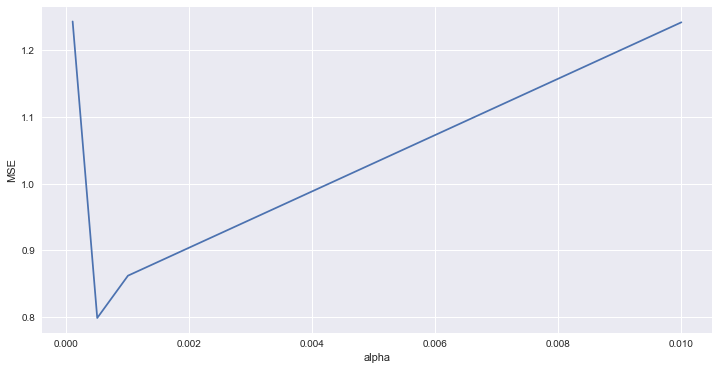

In [37]:
# LASSO - Least Absolute Shrinkage and Selection Operator

from sklearn.linear_model import Lasso

alphas = [0.0001, 0.0005, 0.001, 0.01]
mse = []
def lasso_regression(alpha):
    print('alpha = ', alpha)
    lassoreg = Lasso(alpha=alpha, max_iter = 1e4)
    lassoreg.fit(X_train, y_train)
    print( 'absolute sum of coefficients: ', round(sum(abs(lassoreg.coef_)),3), 'for alpha = ', alpha)
    return lassoreg.predict(X_test)

for i in alphas:
    mse_ = mean_squared_error(y_test, lasso_regression(i))
    mse.append(mse_)
    print('MSE: ', mse_)
    print('--------------------------')

plt.plot(alphas, mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

We can see that Lasso algorithm has stronger penalization. While fow alpha = 0.01 sum of coefficients for Ridge regression is 11.291, for Lasso regression it is 1.824.

### ElasticNet Regression

ElasticNet regression is combination between Lasso and Ridge. Here parameter 'l1_ratio' is used for definition how much L1 regularization is used and the rest for L2.

In [38]:
from sklearn.linear_model import ElasticNet

elasticreg = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter=1e5)
elasticreg.fit(X_train, y_train)
y_pred = elasticreg.predict(X_test)

mean_squared_error(y_test, y_pred)
value = df.loc['2018-08-09', 'col_1':].values.reshape(1,-1)
y = elasticreg.predict(value)
y

array([-0.44875174])

## Tuning job

Tuning hyper-parameters is about adjustment hyper-parameters so that our model has the highest possible accuracy (or other applied metrics). As mentioned above, Grid Search approach will be used. 

In [41]:
from sklearn.model_selection import GridSearchCV


def best_models(models, params_grid, X_train, y_train):
    _models = {}
    _mse = {}
    
    for model in models:
        model_title = model        
        model = models.get(model) 
        hyper_parameters_list = params_grid.get(model_title).keys()
        params = params_grid.get(model_title)
               
        gs = GridSearchCV(model, params, scoring = 'neg_mean_squared_error', cv=3)
        gs.fit(X_train, y_train)     
        _models[model_title] = gs.best_params_
        _mse[model_title] = mean_squared_error(gs.predict(X_train), y_train)
    return gs, _models, _mse    

# which types of regression will be tuned
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=1e5),
    'ElasticNet': ElasticNet(max_iter=1e5)    
}


params_grid = {
    'Ridge': {'alpha' : [ 0.01, 0.1, 1, 3, 5, 10, 50, 100, 1000]},
    'Lasso': {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]},
    'ElasticNet': {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 5], 'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7] }    
}    

best_model = best_models(models, params_grid, X_train, y_train)
print('Best hyper-parameters: ', best_model[1])
print('MSE for each model: ', best_model[2])

Best hyper-parameters:  {'Ridge': {'alpha': 100}, 'Lasso': {'alpha': 0.001}, 'ElasticNet': {'alpha': 0.001, 'l1_ratio': 0.4}}
MSE for each model:  {'Ridge': 0.01556137706045473, 'Lasso': 0.01153738653110817, 'ElasticNet': 0.009655471172796023}


Optimal hyper-parameters are selected. The correspondent MSE are shown. From the information above we can conclude that ElasticNet is the best model because it has the lowest MSE. We may verify this information programmaticaly as well:

In [42]:
gs = best_model[0]
gs.best_estimator_

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=100000.0, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Now we should validate the model on the validation window (test set): 

In [43]:
pred = gs.best_estimator_.predict(X_test)
print('MSE:' , mean_squared_error(pred, y_test))

MSE: 0.784355291405713


In [44]:
predictor = df.loc['2018-08-09', 'col_1':].values.reshape(1,-1)
gs.best_estimator_.predict(predictor)

array([-0.41956742])

As we may see, the validation MSE is worth than the training MSE.

### Visualization of the model on training and validation window

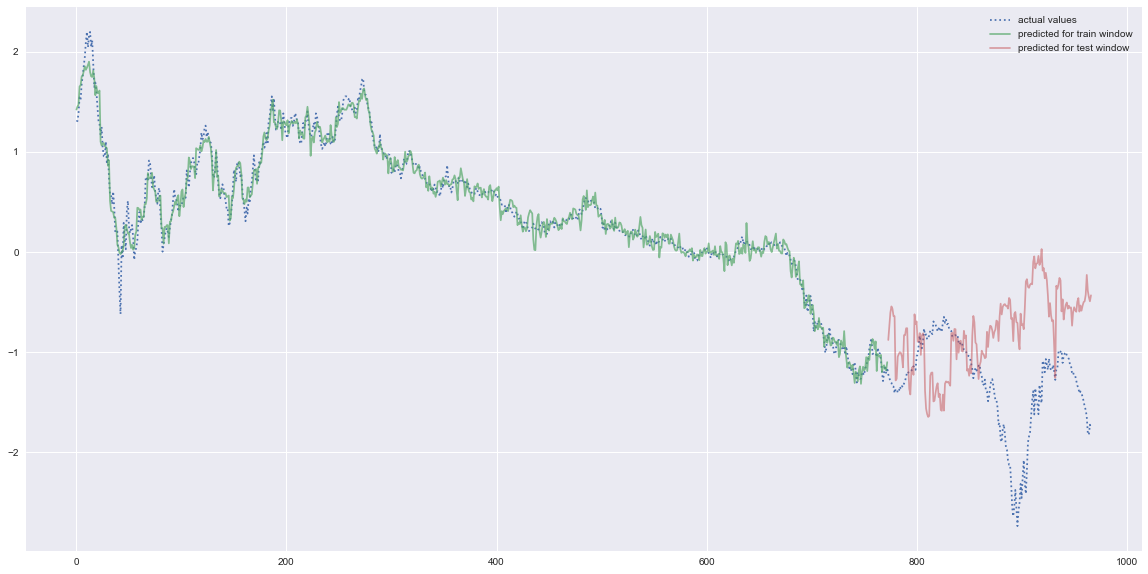

In [45]:
pred_train = gs.best_estimator_.predict(X_train)
plt.figure(figsize=(20,10))
plt.plot([x for x in y_train] + [x for x in y_test], ':')
plt.plot([x for x in pred_train], alpha=0.7)
plt.plot([None for i in pred_train] + [x for x in pred], alpha=0.5)
plt.legend(['actual values', 'predicted for train window', 'predicted for test window'])
plt.show()

### Summary

| Model | MSE | Predicted value |
|------|-----|-----------------|
| Naive Forecast | 0.007 | -1.760|
| Moving Average | 0.008 | -1.780|
| Linear Regression | 0.746 | -0.353|
| ElasticNet Regression | 0.784 | -0.420|

In this project pure time series methods seem to be more appropriate and accurate. 